<center><h1>Wang_Jason_HW1_jasonwangg1321_5363148736</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
!pip install ucimlrepo
# need to install ucimlrepo package

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from ucimlrepo import fetch_ucirepo 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, f1_score
import math

Get the Vertebral Column Data Set

In [3]:
# fetching dataset from https://archive.ics.uci.edu/dataset/212/vertebral+column (using import option on website)
vertebral_column = fetch_ucirepo(id=212) 
  # data (as pandas dataframes) 
X = vertebral_column.data.features #independent var
y = vertebral_column.data.targets  #dependent var

print(X.head())
print(y.head())

X['Class'] = y['class'].values
print(X.to_string())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
0         63.027817    22.552586              39.609117     40.475232  \
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  
    class
0  Hernia
1  Hernia
2  Hernia
3  Hernia
4  Hernia
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis              Class
0           63.027817    22.552586              39.609117     40.475232      98.672917             

In [4]:
#normal = 0 , else = 1
X['Class'] = np.where(X.Class == 'Normal',0,1)
print(X.to_string())


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis  Class
0           63.027817    22.552586              39.609117     40.475232      98.672917                 -0.254400      1
1           39.056951    10.060991              25.015378     28.995960     114.405425                  4.564259      1
2           68.832021    22.218482              50.092194     46.613539     105.985135                 -3.530317      1
3           69.297008    24.652878              44.311238     44.644130     101.868495                 11.211523      1
4           49.712859     9.652075              28.317406     40.060784     108.168725                  7.918501      1
5           40.250200    13.921907              25.124950     26.328293     130.327871                  2.230652      1
6           53.432928    15.864336              37.165934     37.568592     120.567523                  5.988551      1
7           45.366754    10.755611      

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

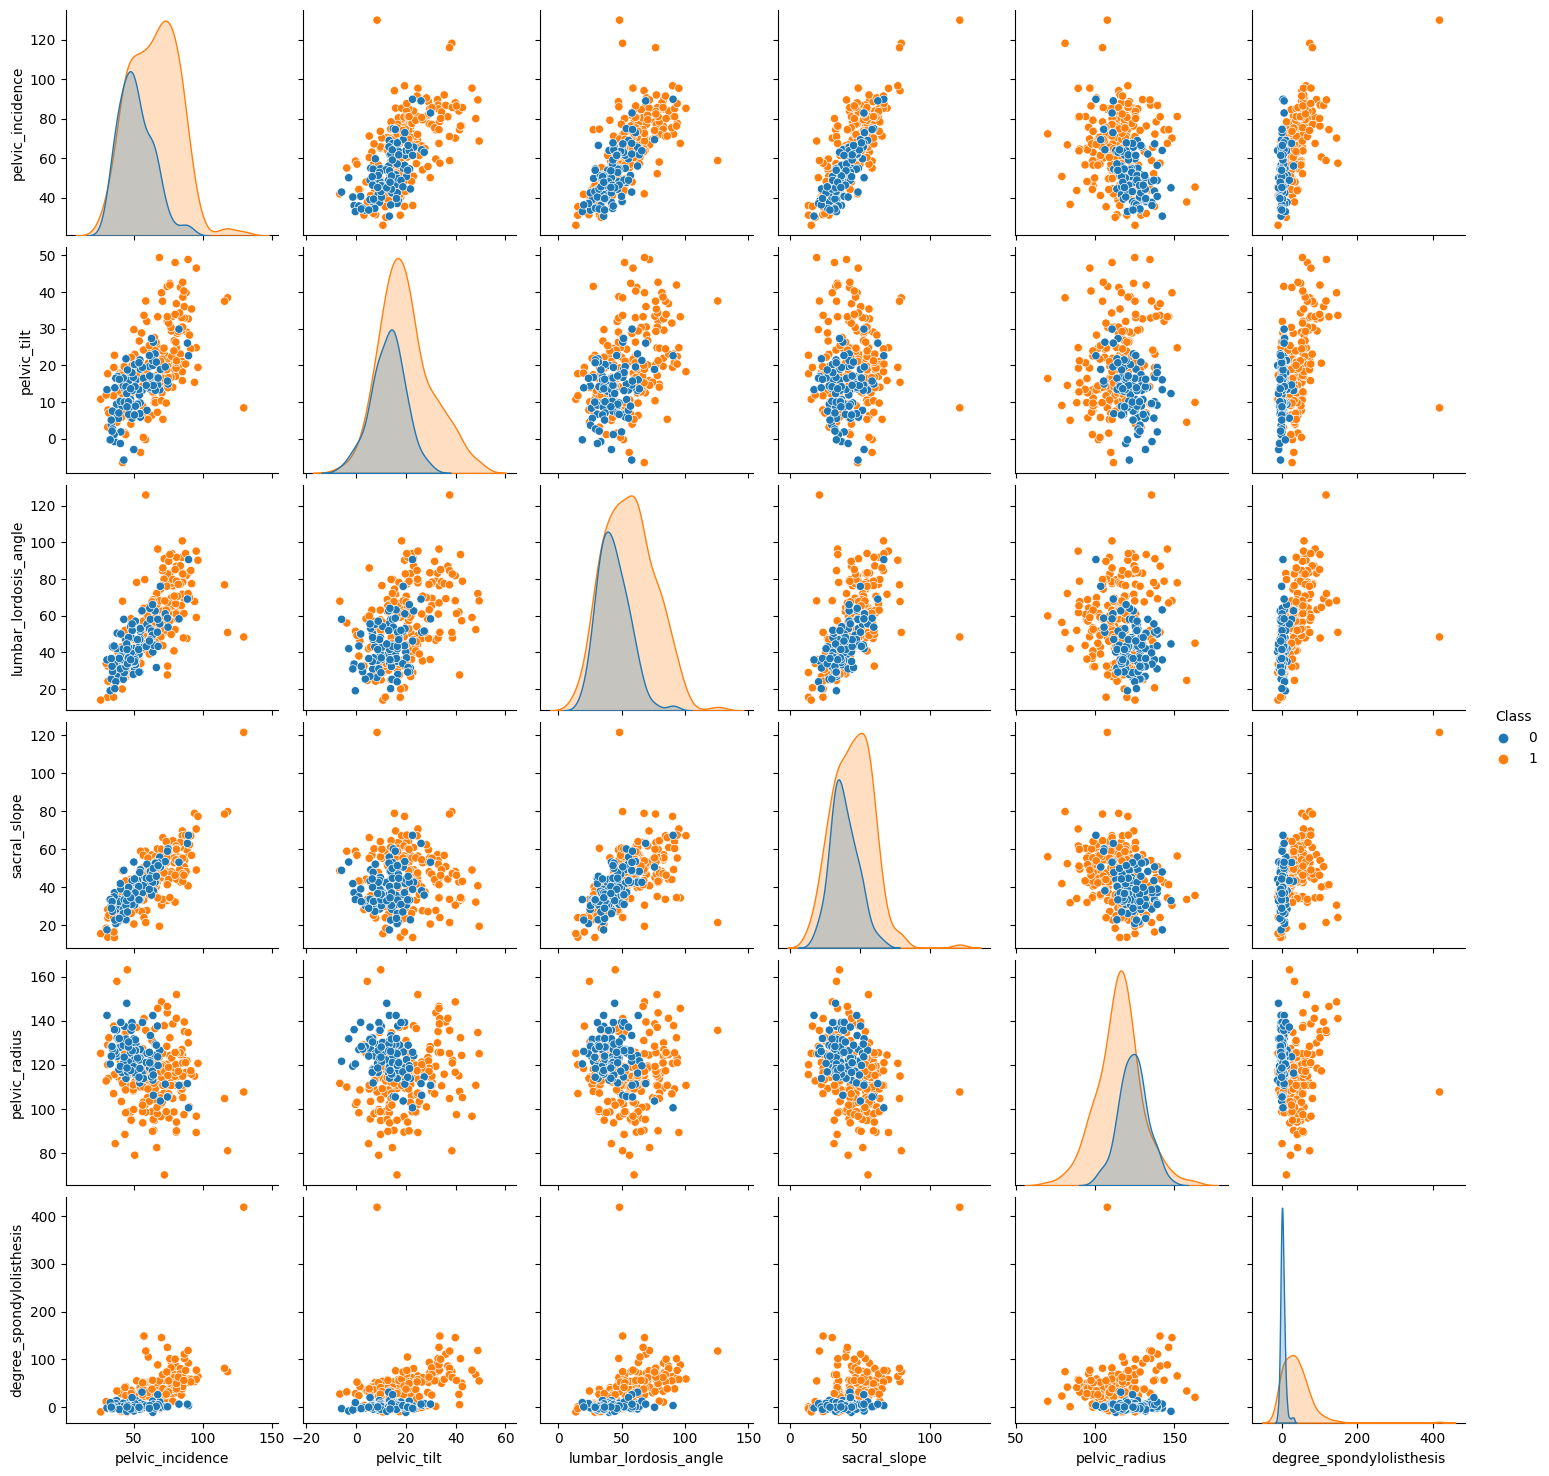

In [5]:
# Using Seaborn, allowed in Piazza
# https://seaborn.pydata.org/generated/seaborn.pairplot.html 

plot = sns.pairplot(X,hue = 'Class') #pairplot is used as it automatically plots the features against eachother, instead of having to specify each feature with a scatterplot

#### ii. Boxplots

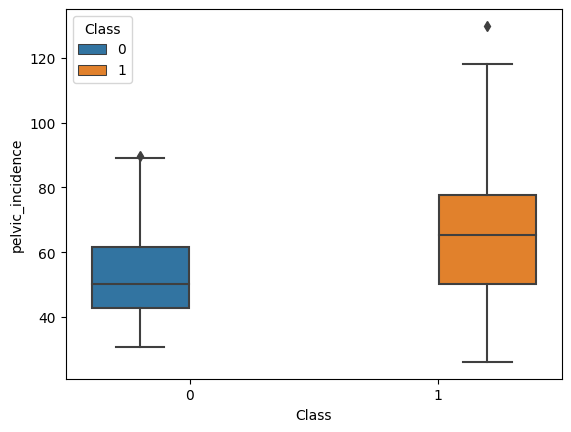

In [6]:
# Looking at pelvic incidence compared to Class
sns.boxplot(data = X, x = 'Class', y = 'pelvic_incidence', hue = 'Class')
plt.show()

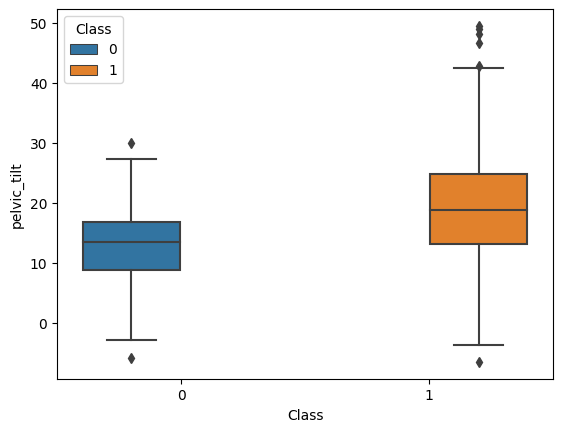

In [7]:
# Looking at pelvic tilt compared to Class
sns.boxplot(data = X, x = 'Class', y = 'pelvic_tilt', hue = 'Class')
plt.show()


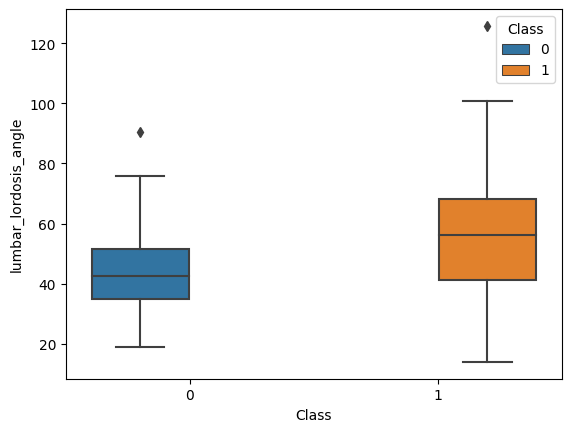

In [8]:
# Looking at lumbar lordosis angle compared to Class
sns.boxplot(data = X, x = 'Class', y = 'lumbar_lordosis_angle', hue = 'Class')
plt.show()

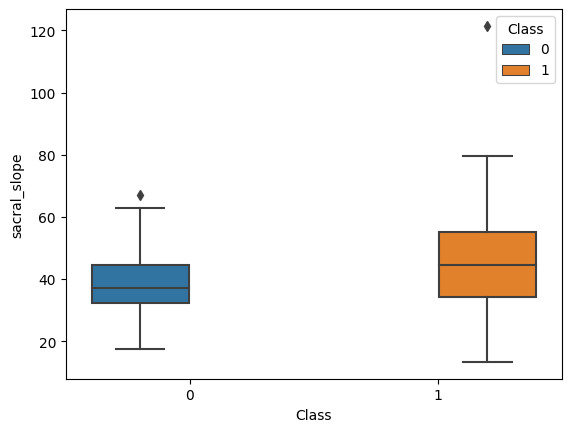

In [9]:
# Looking at sacral slope compared to Class
sns.boxplot(data = X, x = 'Class', y = 'sacral_slope', hue = 'Class')
plt.show()


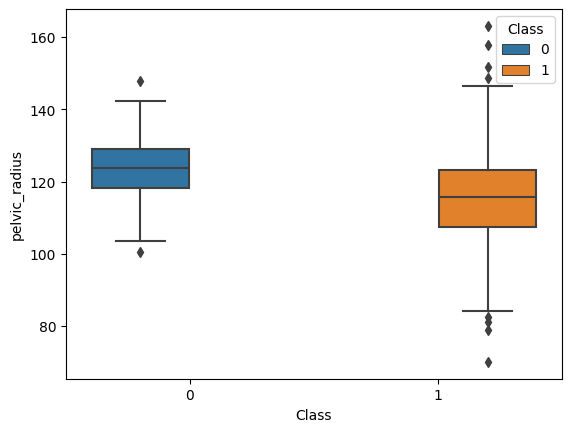

In [10]:
# Looking at pelvic radius compared to Class
sns.boxplot(data = X, x = 'Class', y = 'pelvic_radius', hue = 'Class')
plt.show()

<Axes: xlabel='Class', ylabel='degree_spondylolisthesis'>

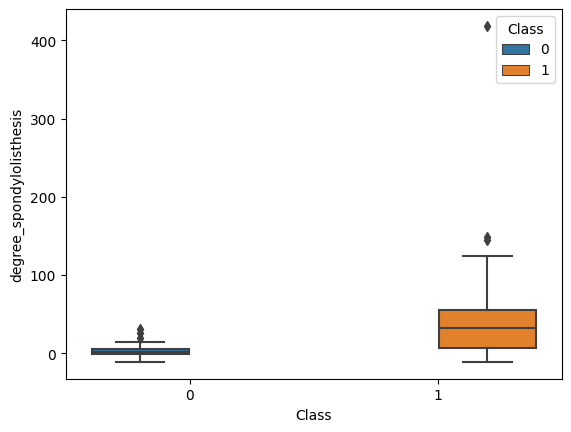

In [11]:
# Looking at degree spondylolisthesis compared to Class
sns.boxplot(data = X, x = 'Class', y = 'degree_spondylolisthesis', hue = 'Class')

#### iii. Split Data Set

In [12]:
#splitting dataset where class = 0 
data_0 = X.loc[X['Class'] == 0]
training_0 = data_0[:70]
test_0 = data_0[70:]

#splitting dataset where class = 1
data_1 = X.loc[X['Class'] == 1]
training_1 = data_1[:140]
test_1 = data_1[140:]

#Combining training sets from class = 0 and class = 1
final_training = pd.concat([training_0, training_1])

#Combining test sets from class = 0 and class = 1
final_test = pd.concat([test_0, test_1])


# shuffle the training and test lists using  scikit shuffle (https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html)
shuffled_training = shuffle(final_training)
shuffled_test = shuffle(final_test)

# Seperating into feature and target arrays, where x are the independent variables and y is the target
x_training = shuffled_training[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
x_test = shuffled_test[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]

y_training = shuffled_training[['Class']]
y_test = shuffled_test[['Class']]



### (c) Classification

#### i. Euclidean Metric

In [13]:
# will be using software package KNeighborsClassifier from sklearn

#### ii. Test Data

In [14]:
# testing with k nearest neighbors where k in [208 ... 1]
k_val = list(range(208, 0, -3))
# https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/ learning how to use knn from this website
training_errors = []
testing_errors = []

for i,k in enumerate(k_val):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_training, y_training.values.ravel())
    # predicting training data and calculating error
    y_training_pred = knn.predict(x_training)
    training_error = 1 - accuracy_score(y_training, y_training_pred)
    training_errors.append(training_error)
    # predicting testing data and calculating error
    y_testing_pred = knn.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred)
    testing_errors.append(testing_error)



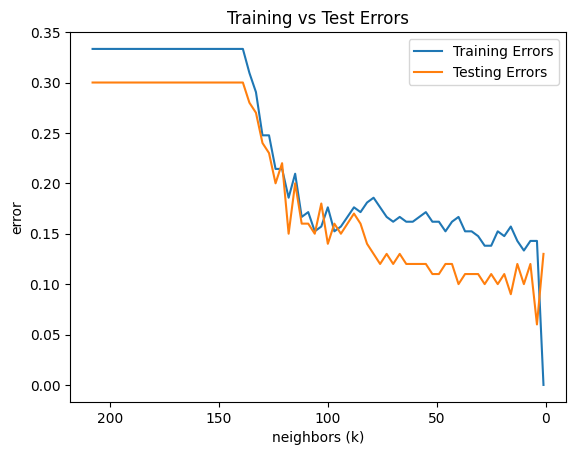

In [15]:
plt.plot(k_val, training_errors, label = 'Training Errors')
plt.plot(k_val, testing_errors, label = 'Testing Errors')
plt.title('Training vs Test Errors')
plt.xlabel('neighbors (k)')
plt.ylabel('error')
plt.legend()
plt.gca().invert_xaxis() # to show reverse order of k
plt.show()



In [16]:
suitable_k = 0
min_test_error = float('0.35')

for i, error in enumerate(testing_errors):
    if error < min_test_error:
        min_test_error = error
        suitable_k = k_val[i]

print(f'The most optimal k* is at {suitable_k}')
# we can see the lowesting test error is at k = 4

The most optimal k* is at 4


In [17]:
# Finding Confusion Matrix at k=k*
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(x_training, y_training.values.ravel())
y_testing_pred4 = knn4.predict(x_test)

matrix = confusion_matrix(y_test, y_testing_pred4)
matrix

    

array([[25,  5],
       [ 1, 69]], dtype=int64)

In [18]:
#TP Rate, True Negative Rate, Precision, F1 score
# [TN, FP]
# [FN, TP]

TP_Rate = 69/(69+1)
print(f'TP_Rate is {TP_Rate}')

TN_Rate = 25/(25+5)
print(f'TN_Rate is {TN_Rate}')

Precision = precision_score(y_test, y_testing_pred4)
print(f'Precision is {Precision}')

F1_Score = f1_score(y_test, y_testing_pred4)
print(f'F1_Score is {F1_Score}')





TP_Rate is 0.9857142857142858
TN_Rate is 0.8333333333333334
Precision is 0.9324324324324325
F1_Score is 0.9583333333333333


#### iii. Learning Curve

In [19]:
# N in {10,20,30, ... 210} (training set)
n_val = list(range(10, 220, 10))

#for each N, select training set by choosing the first [N/3] rows of class 0 and the first N - [N/3] rows of class 1 in the training set craeted in 1(b)iii.
#also for each N, select the optimal k from a set starting from k = 1, increasing by 5.
#for example, if N = 200, the optimal k is selected from {1,6,11,... 196}
optimal_test_errors = {}

for i,n in enumerate(n_val):
    subset_training0 = training_0[0:math.floor(n/3)]
    subset_training1 = training_1[0:(n-math.floor(n/3))]

    combined_subset_training = pd.concat([subset_training0,subset_training1])
    shuffled_subset_training = shuffle(combined_subset_training)
    x_subset_training = shuffled_subset_training[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
    y_subset_training = shuffled_subset_training[['Class']]


    optimal_k = list(range(1,n,5))
    min_test_error = float('0.35')
    for j,k in enumerate(optimal_k):
        sub_knn = KNeighborsClassifier(n_neighbors= k)
        sub_knn.fit(x_subset_training,y_subset_training.values.ravel())
        y_sub_testing_pred = sub_knn.predict(x_test)
        subset_testing_error = 1 - accuracy_score(y_test,y_sub_testing_pred)
        
        if subset_testing_error < min_test_error:
            min_test_error = subset_testing_error
    
    optimal_test_errors[n] = min_test_error


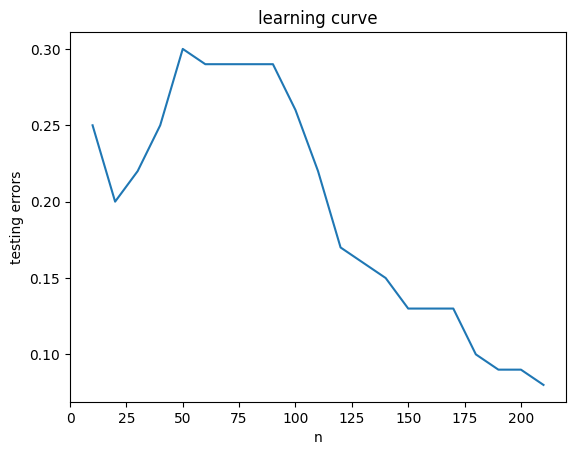

In [20]:
plt.plot(n_val,optimal_test_errors.values())
plt.xlabel('n')
plt.ylabel('testing errors')
plt.title('learning curve')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [21]:
# Summary Table
summary = {}

In [22]:
k_vals = list(range(1,200,5))
training_errors = {}
testing_errors = {}

for i,k in enumerate(k_vals):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1, metric = 'minkowski')
    knn_manhattan.fit(x_training, y_training.values.ravel())
    # predicting training data and calculating error
    y_training_pred_manh = knn_manhattan.predict(x_training)
    training_error = 1 - accuracy_score(y_training, y_training_pred_manh)
    training_errors[k] = training_error
    # predicting testing data and calculating error
    y_testing_pred_manh = knn_manhattan.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred_manh)
    testing_errors[k] = testing_error

min_testing_error = min(testing_errors.values())
testing_res = [k for k in testing_errors if testing_errors[k] == min_testing_error]
print(f'the most optimal k* is at {testing_res}')
print(f'the most optimal k* has error {testing_errors.get(6)}')



the most optimal k* is at [1, 6, 11, 26]
the most optimal k* has error 0.10999999999999999


In [23]:
#looking at training errors instead because of multiple optimal k* in testing error dict
print(training_errors.get(1))
print(training_errors.get(6))
print(training_errors.get(11))
print(training_errors.get(26))
print('The most optimal k* is 6 as it has the lowest testing error and training error excluding k =1 because that would follow the training data too closely, leading to high variance and low bias')
summary['Manhattan'] = testing_errors.get(6)

0.0
0.13809523809523805
0.1428571428571429
0.16666666666666663
The most optimal k* is 6 as it has the lowest testing error and training error excluding k =1 because that would follow the training data too closely, leading to high variance and low bias


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [24]:
# log_10(p) = x
# 10^x = p
p_vals = [p/10 for p in range(1, 11, 1)]
log_pvals = []
for v in p_vals:
    res = 10**v
    log_pvals.append(res)

testing_errors_log = {}
for i,pval in enumerate(log_pvals):
    knn_log_manhattan = KNeighborsClassifier(n_neighbors = 6, p=pval, metric= 'minkowski')
    knn_log_manhattan.fit(x_training, y_training.values.ravel())
    y_testing_pred_log = knn_log_manhattan.predict(x_test)
    testing_error_log = 1 - accuracy_score(y_test,y_testing_pred_log)
    testing_errors_log[pval] = testing_error_log

min_testing_error_log = min(testing_errors_log.values())
testing_res_log = [pval for pval in testing_errors_log if testing_errors_log[pval] == min_testing_error_log]

print(f'the most optimal p is at {testing_res_log}')
print(f'the most optimal p has error {testing_errors_log.get(3.9810717055349722)}')
summary['Log_Manhattan'] = testing_errors_log.get(3.9810717055349722)


the most optimal p is at [3.9810717055349722]
the most optimal p has error 0.06000000000000005


##### C. Chebyshev Distance With p -> infinity.

In [25]:
k_vals = list(range(1,200,5))
Chebyshev_testing_errors = {}
Chebyshev_training_errors = {}

for i,k in enumerate(k_vals):
    knn_Chebyshev = KNeighborsClassifier(n_neighbors=k, p= math.inf, metric = 'minkowski')
    knn_Chebyshev.fit(x_training, y_training.values.ravel())
    # predicting training data and calculating error
    y_training_pred_chebyshev = knn_Chebyshev.predict(x_training)
    training_error = 1 - accuracy_score(y_training, y_training_pred_chebyshev)
    Chebyshev_training_errors[k] = training_error
    # predicting testing data and calculating error
    y_testing_pred_chebyshev = knn_Chebyshev.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred_chebyshev)
    Chebyshev_testing_errors[k] = testing_error

min_testing_error = min(Chebyshev_testing_errors.values())
testing_res = [k for k in Chebyshev_testing_errors if Chebyshev_testing_errors[k] == min_testing_error]
print(f'the most optimal k* is at {testing_res}')
print(f'the most optimal k has error {Chebyshev_testing_errors.get(16)}')
# looking at training error for 1F:
min_training_error = min(Chebyshev_training_errors.values())
training_res = [k for k in Chebyshev_training_errors if Chebyshev_training_errors[k] == min_training_error]
print(f'the most optimal training k* is at {training_res}')
print(f'the most optimal training k has error {Chebyshev_training_errors.get(1)}')

summary['Chebyshev'] = Chebyshev_testing_errors.get(16)





the most optimal k* is at [16]
the most optimal k has error 0.07999999999999996
the most optimal training k* is at [1]
the most optimal training k has error 0.0


#### ii. Mahalanobis Distance.

In [26]:
# requires inverrting the covariance matrix of the data. features have to be transformed into a reduced feature set in the linear subspace.
# equivalent to using a psuedoinverse instead of an inverse.
k_vals = list(range(1,200,5))
mahalanobis_testing_errors = {}

# https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics using this link as reference to my mahalanobis distance
cov_x = np.cov(x_training,rowvar= False)
inv = np.linalg.inv(cov_x)

for i,k in enumerate(k_vals):
    knn_mahalaniobis = KNeighborsClassifier(n_neighbors= k, metric = 'mahalanobis', metric_params={'VI':inv})  
    knn_mahalaniobis.fit(x_training, y_training.values.ravel())
    y_testing_pred_mahalanobis = knn_mahalaniobis.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred_mahalanobis)
    mahalanobis_testing_errors[k] = testing_error

min_testing_error = min(mahalanobis_testing_errors.values())
testing_res = [k for k in mahalanobis_testing_errors if mahalanobis_testing_errors[k] == min_testing_error]
print(f'the most optimal k* is at {testing_res}')
print(f'the most optimal k* has error {mahalanobis_testing_errors.get(6)}')
print(f'we would use k = 6 here as it will lead to less overfitting')

summary['Mahalanobis'] = mahalanobis_testing_errors.get(6)

the most optimal k* is at [1, 6]
the most optimal k* has error 0.16000000000000003
we would use k = 6 here as it will lead to less overfitting


In [27]:
summary_table = pd.DataFrame(summary.items(), columns= ['Metric', 'Error'])
display(summary_table)

,Metric,Error
0,Manhattan,0.11
1,Log_Manhattan,0.06
2,Chebyshev,0.08
3,Mahalanobis,0.16


### (e) Weighted Decision

In [28]:
#Euclidian
k_val = list(range(1,200,5))

training_errors = {}
testing_errors = {}

for i,k in enumerate(k_val):
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn.fit(x_training, y_training.values.ravel())
    # predicting training data and calculating error
    y_training_pred = knn.predict(x_training)
    training_error = 1 - accuracy_score(y_training, y_training_pred)
    training_errors[k] = training_error
    # predicting testing data and calculating error
    y_testing_pred = knn.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred)
    testing_errors[k] = testing_error

min_testing_error = min(testing_errors.values())
testing_res = [k for k in testing_errors if testing_errors[k] == min_testing_error]
print(f'the most optimal k* is at {testing_res}, compared to 4 with majority polling decision')
print(f'the error at k* = 6 is {testing_errors.get(6)}')
    


the most optimal k* is at [6], compared to 4 with majority polling decision
the error at k* = 6 is 0.09999999999999998


In [29]:
#Manhattan
k_vals = list(range(1,200,5))
training_errors = {}
testing_errors = {}

for i,k in enumerate(k_vals):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance', metric = 'minkowski')
    knn_manhattan.fit(x_training, y_training.values.ravel())
    # predicting training data and calculating error
    y_training_pred_manh = knn_manhattan.predict(x_training)
    training_error = 1 - accuracy_score(y_training, y_training_pred_manh)
    training_errors[k] = training_error
    # predicting testing data and calculating error
    y_testing_pred_manh = knn_manhattan.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred_manh)
    testing_errors[k] = testing_error

min_testing_error = min(testing_errors.values())
testing_res = [k for k in testing_errors if testing_errors[k] == min_testing_error]
print(f'the most optimal k* is at {testing_res}, compared to 6 with majority polling decision')
print(f'the error at k* = 26 is {testing_errors.get(26)}')


the most optimal k* is at [26], compared to 6 with majority polling decision
the error at k* = 26 is 0.09999999999999998


In [30]:
k_vals = list(range(1,200,5))
Chebyshev_testing_errors = {}
Chebyshev_training_errors = {}

for i,k in enumerate(k_vals):
    knn_Chebyshev = KNeighborsClassifier(n_neighbors=k, p= math.inf, weights= 'distance', metric = 'minkowski')
    knn_Chebyshev.fit(x_training, y_training.values.ravel())

    # predicting training data and calculating error as there are multiple optimal values of k*
    y_training_pred_chebyshev = knn_Chebyshev.predict(x_training)
    training_error = 1 - accuracy_score(y_training, y_training_pred_chebyshev)
    Chebyshev_training_errors[k] = training_error
    # predicting testing data and calculating error
    y_testing_pred_chebyshev = knn_Chebyshev.predict(x_test)
    testing_error = 1 - accuracy_score(y_test,y_testing_pred_chebyshev)
    Chebyshev_testing_errors[k] = testing_error


min_testing_error = min(Chebyshev_testing_errors.values())
testing_res = [k for k in Chebyshev_testing_errors if Chebyshev_testing_errors[k] == min_testing_error]
print(f'the most optimal k* is at {testing_res}')
print(f'the most optimal k has error {Chebyshev_testing_errors.get(16)}')

print(f'In this case, since there are multiple k* values that have the minimum error, I would go with 36. When looking at the training error, I am getting 0 all across. Since this is the case, I want to choose a K that is in the middle to not have too high of variance or bias.')


the most optimal k* is at [16, 31, 36, 41, 61]
the most optimal k has error 0.10999999999999999
In this case, since there are multiple k* values that have the minimum error, I would go with 36. When looking at the training error, I am getting 0 all across. Since this is the case, I want to choose a K that is in the middle to not have too high of variance or bias.


### (f) Training Error Rate

The lowest Training error Rate I achieved in this homework was 0.0. A training error of 0.0 was achieved for when k=1 for multiple distance metrics. This is seen multiple times throughout the homework as when k=1, the test data resembles the training data too closely leading to overfitting and achieving a training error rate of 0.0.
